In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Data reading

In [2]:
#raw_data = pd.read_csv("raw_data.csv")
raw_data = pd.read_csv("GSPC.csv") #S&P

### S&P openings

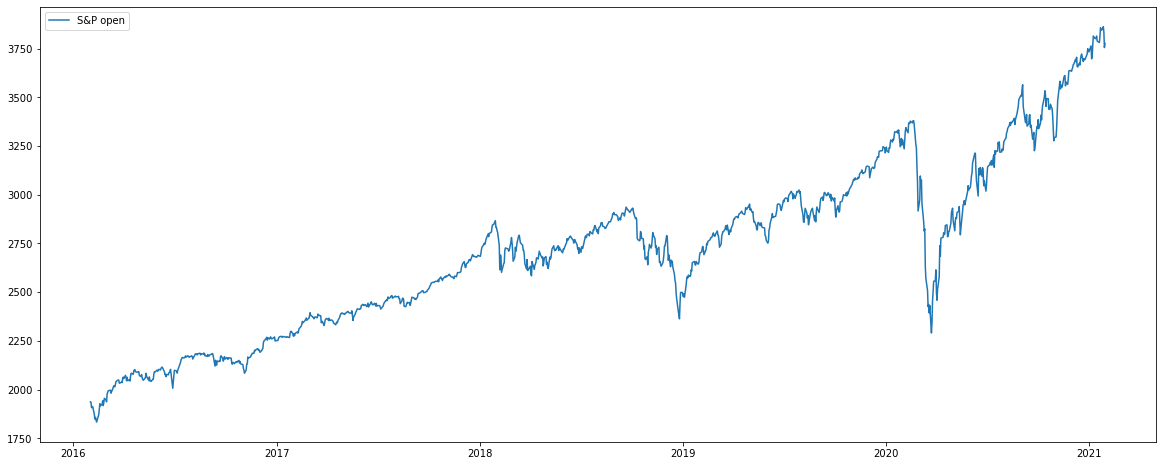

In [3]:
plt.figure(figsize=(20,8))
days = np.array(raw_data['Date'], dtype="datetime64[ms]")
plt.plot(days,raw_data["Open"])
plt.legend(["S&P open" ])

In [5]:
raw_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-02-01,1936.939941,1947.199951,1920.300049,1939.380005,1939.380005,4322530000
1,2016-02-02,1935.260010,1935.260010,1897.290039,1903.030029,1903.030029,4463190000
2,2016-02-03,1907.069946,1918.010010,1872.229980,1912.530029,1912.530029,5172950000
3,2016-02-04,1911.670044,1927.349976,1900.520020,1915.449951,1915.449951,5193320000
4,2016-02-05,1913.069946,1913.069946,1872.650024,1880.050049,1880.050049,4929940000


### Train test split

Since the data is a sequence we cannot chose them randomly but to choose a cutoff of train data (80% first points).

In [6]:
n_points = 6#lookback 
# train test split
split = int(0.8 * len(raw_data))
train = raw_data["Close"].values[:split+n_points] #little overlaping, extra n_points, index split show first column, we need n_points more
test = raw_data["Close"].values[split:]

## Building dataset input to the deep learnig model 

*n_points* (N) is lookback number. it shows how many previous time  points in sequence is taken to the sample (row) in training/testing data. last column  is a label. 

In [7]:
def make_input(data,n_points):
    '''
    Function generating the np.array with train/test points as an input for ML models
    '''
    n_rows = len(data)
    result = np.empty((n_rows - n_points,n_points))
    for i in range(n_rows-n_points):
                result[i,:] = data[i : i+n_points]
    return result

In [8]:
data = raw_data["Close"].values
X_train  = make_input(train,n_points)
X_test = make_input(test,n_points)
y_train = raw_data["Close"].values[n_points:split+n_points]
y_test = raw_data["Close"].values[split+n_points:]

In [9]:
#data visualisation
column_name = [f"T_(N-{i})" for i in range(n_points,0,-1)]
Xtrn = pd.DataFrame(X_train,columns = column_name)
Xtrn["label T_N"] = y_train
Xtrn

,T_(N-6),T_(N-5),T_(N-4),T_(N-3),T_(N-2),T_(N-1),label T_N
0,1939.380005,1903.030029,1912.530029,1915.449951,1880.050049,1853.439941,1852.209961
1,1903.030029,1912.530029,1915.449951,1880.050049,1853.439941,1852.209961,1851.859985
2,1912.530029,1915.449951,1880.050049,1853.439941,1852.209961,1851.859985,1829.079956
3,1915.449951,1880.050049,1853.439941,1852.209961,1851.859985,1829.079956,1864.780029
4,1880.050049,1853.439941,1852.209961,1851.859985,1829.079956,1864.780029,1895.579956
...,...,...,...,...,...,...,...
1002,3295.469971,3243.629883,3276.239990,3273.399902,3283.659912,3225.520020,3248.919922
1003,3243.629883,3276.239990,3273.399902,3283.659912,3225.520020,3248.919922,3297.590088
1004,3276.239990,3273.399902,3283.659912,3225.520020,3248.919922,3297.590088,3334.689941
1005,3273.399902,3283.659912,3225.520020,3248.919922,3297.590088,3334.689941,3345.780029


In [10]:
Xtst = pd.DataFrame(X_test,columns = column_name)
Xtst["label T_N"] = y_test
Xtst

,T_(N-6),T_(N-5),T_(N-4),T_(N-3),T_(N-2),T_(N-1),label T_N
0,3225.520020,3248.919922,3297.590088,3334.689941,3345.780029,3327.709961,3352.090088
1,3248.919922,3297.590088,3334.689941,3345.780029,3327.709961,3352.090088,3357.750000
2,3297.590088,3334.689941,3345.780029,3327.709961,3352.090088,3357.750000,3379.449951
3,3334.689941,3345.780029,3327.709961,3352.090088,3357.750000,3379.449951,3373.939941
4,3345.780029,3327.709961,3352.090088,3357.750000,3379.449951,3373.939941,3380.159912
...,...,...,...,...,...,...,...
241,3795.540039,3768.250000,3798.909912,3851.850098,3853.070068,3841.469971,3855.360107
242,3768.250000,3798.909912,3851.850098,3853.070068,3841.469971,3855.360107,3849.620117
243,3798.909912,3851.850098,3853.070068,3841.469971,3855.360107,3849.620117,3750.770020
244,3851.850098,3853.070068,3841.469971,3855.360107,3849.620117,3750.770020,3787.379883


### Scaling Data

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Building LSTM network

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,LSTM

In [14]:
model = Sequential()
#model.add(LSTM(4, input_shape=(1, n_points)))
#model.add(LSTM(60,return_sequences=True))
#model.add(LSTM(60,return_sequences=True))
model.add(LSTM(60))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [15]:
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape( (X_test.shape[0], 1, X_test.shape[1]))

In [16]:
model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
1007/1007 - 1s - loss: 6640732.5000
Epoch 2/100
1007/1007 - 1s - loss: 6343479.5000
Epoch 3/100
1007/1007 - 1s - loss: 6096825.5000
Epoch 4/100
1007/1007 - 1s - loss: 5866677.5000
Epoch 5/100
1007/1007 - 1s - loss: 5645778.0000
Epoch 6/100
1007/1007 - 1s - loss: 5431257.5000
Epoch 7/100
1007/1007 - 1s - loss: 5221680.0000
Epoch 8/100
1007/1007 - 1s - loss: 5017060.5000
Epoch 9/100
1007/1007 - 1s - loss: 4817000.5000
Epoch 10/100
1007/1007 - 1s - loss: 4621261.5000
Epoch 11/100
1007/1007 - 1s - loss: 4429968.0000
Epoch 12/100
1007/1007 - 1s - loss: 4243160.0000
Epoch 13/100
1007/1007 - 1s - loss: 4060494.5000
Epoch 14/100
1007/1007 - 1s - loss: 3882410.0000
Epoch 15/100
1007/1007 - 1s - loss: 3708779.7500
Epoch 16/100
1007/1007 - 1s - loss: 3539202.0000
Epoch 17/100
1007/1007 - 1s - loss: 3373934.7500
Epoch 18/100
1007/1007 - 1s - loss: 3213194.0000
Epoch 19/100
1007/1007 - 1s - loss: 3056578.2500
Epoch 20/100
1007/1007 - 1s - loss: 2904578.7500
Epoch 21/100
1007/1007 - 1s -

Loss function plot

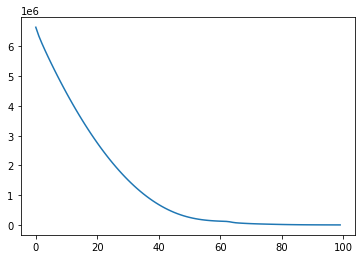

In [18]:
plt.plot(model.history.history["loss"])

## Model Evaluation

In [19]:
training_score = model.evaluate(X_train,y_train,verbose=0)
test_score = model.evaluate(X_test,y_test,verbose=0)

In [20]:
training_score

3454.50244140625

In [21]:
test_score

148280.9375

In [22]:
test_predictions = model.predict(X_test)

In [23]:
summary = pd.DataFrame({"test" : y_test.reshape(-1,),
                        "prediction":test_predictions.reshape(-1,)})

In [24]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
#TODO find other metrics

In [25]:
mean_absolute_error(summary['test'],summary['prediction'])

310.50953537315803

In [26]:
mean_squared_error(summary['test'],summary['prediction'])

148280.9206604385

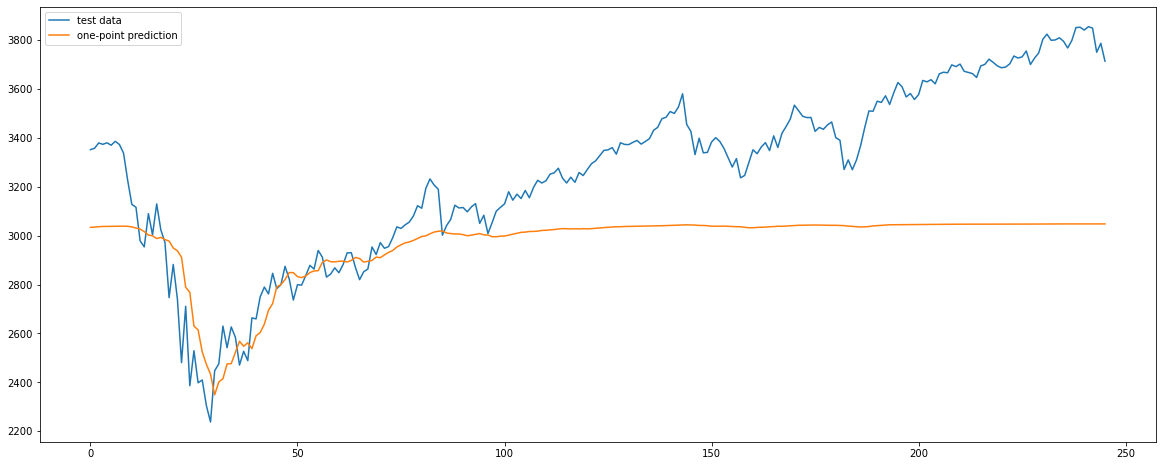

In [27]:
plt.figure(figsize=(20,8))
plt.plot(summary["test"])
plt.plot(summary["prediction"])
plt.legend(["test data", "one-point prediction"])

Comparison of test data, prediction and relative error

REMARK: I used only one point ahead prediction

In [28]:
summary['rel_error'] = np.abs((summary['test']- summary['prediction'])/summary['test'])

In [29]:
summary

,test,prediction,rel_error
0,3352.090088,3034.065186,0.094874
1,3357.750000,3035.526367,0.095964
2,3379.449951,3036.757812,0.101405
3,3373.939941,3037.760986,0.099640
4,3380.159912,3038.086182,0.101200
...,...,...,...
241,3855.360107,3048.297607,0.209335
242,3849.620117,3048.335449,0.208146
243,3750.770020,3048.388916,0.187263
244,3787.379883,3048.269775,0.195151


In [30]:
round(summary['rel_error'].mean(),2)

0.09

In [31]:
round(summary['rel_error'].std(),2)

0.06